# Nave Bayes on 'tips' data set

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
dataset = sns.load_dataset("tips")
df = dataset.copy()
df.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
df['day'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

### We'll try to predict size

#### Feature Engineering

In [ ]:
# Convert 'sex' column to numeric
df[df['sex'].isna() == True]
## So all columns in 'sex' are properly filled

,total_bill,tip,sex,smoker,day,time,size


In [21]:
df['sex'].replace({'Male' : 1, 'Female' : 0}, inplace=True)
df['smoker'].replace({'No' : 0, 'Yes' : 1},inplace=True)
df.head()

C:\Users\Govind jaiswal\AppData\Local\Temp\ipykernel_14512\557987897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace({'No' : 0, 'Yes' : 1},inplace=True)
C:\Users\Govind jaiswal\AppData\Local\Temp\ipykernel_14512\557987897.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4


In [ ]:
df['time'].unique()
## time has only two values 

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [26]:
df['time'].replace({'Lunch': 0, 'Dinner' : 1},inplace=True)

C:\Users\Govind jaiswal\AppData\Local\Temp\ipykernel_14512\3739391147.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['time'].replace({'Lunch': 0, 'Dinner' : 1},inplace=True)
C:\Users\Govind jaiswal\AppData\Local\Temp\ipykernel_14512\3739391147.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['time'].replace({'Lunch': 0, 'Dinner' : 1},inplace=True)


In [27]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,1,2
1,10.34,1.66,1,0,Sun,1,3
2,21.01,3.50,1,0,Sun,1,3
3,23.68,3.31,1,0,Sun,1,2
4,24.59,3.61,0,0,Sun,1,4


In [29]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
days_encoded = encoder.fit_transform(df[['day']]).toarray()
days_encoded

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [34]:
df_days_encoded = pd.DataFrame(days_encoded, columns=encoder.get_feature_names_out())

In [35]:
df_days_encoded

,day_Fri,day_Sat,day_Sun,day_Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
239,0.0,1.0,0.0,0.0
240,0.0,1.0,0.0,0.0
241,0.0,1.0,0.0,0.0
242,0.0,1.0,0.0,0.0


In [37]:
df = pd.concat([df,df_days_encoded],axis=1)

In [38]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,0,Sun,1,2,0.0,0.0,1.0,0.0
1,10.34,1.66,1,0,Sun,1,3,0.0,0.0,1.0,0.0
2,21.01,3.50,1,0,Sun,1,3,0.0,0.0,1.0,0.0
3,23.68,3.31,1,0,Sun,1,2,0.0,0.0,1.0,0.0
4,24.59,3.61,0,0,Sun,1,4,0.0,0.0,1.0,0.0


In [39]:
df.drop(columns=['day'],inplace=True)

In [40]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,0,1,2,0.0,0.0,1.0,0.0
1,10.34,1.66,1,0,1,3,0.0,0.0,1.0,0.0
2,21.01,3.50,1,0,1,3,0.0,0.0,1.0,0.0
3,23.68,3.31,1,0,1,2,0.0,0.0,1.0,0.0
4,24.59,3.61,0,0,1,4,0.0,0.0,1.0,0.0


In [47]:
df['tip'].unique()

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  4.3 ,  1.45,
        2.5 ,  2.45,  3.27,  3.6 ,  3.07,  2.31,  2.24,  2.54,  3.06,
        1.32,  5.6 ,  6.  ,  2.05,  2.6 ,  5.2 ,  1.56,  4.34,  3.51,
        1.5 ,  1.76,  6.73,  3.21,  1.98,  3.76,  2.64,  3.15,  2.47,
        1.  ,  2.01,  2.09,  1.97,  3.14,  2.2 ,  1.25,  3.08,  4.  ,
        2.71,  3.4 ,  1.83,  2.03,  5.17,  5.85,  3.25,  4.73,  3.48,
        1.64,  4.06,  4.29,  2.55,  5.07,  1.8 ,  2.92,  1.68,  2.52,
        4.2 ,  1.48,  2.18,  2.83,  6.7 ,  2.3 ,  1.36,  1.63,  1.73,
        2.74,  5.14,  3.75,  2.61,  4.5 ,  1.61, 10.  ,  3.16,  5.15,
        3.11,  3.55,  3.68,  5.65,  6.5 ,  4.19,  2.56,  2.02,  1.44,
        3.41,  5.16,  9.  ,  1.1 ,  3.09,  1.92,  1.58,  2.72,  2.88,
        3.39,  1.47,  1.17,  4.67,  5.92,  1.75])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
 6   day_Fri     244 non-null    float64 
 7   day_Sat     244 non-null    float64 
 8   day_Sun     244 non-null    float64 
 9   day_Thur    244 non-null    float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 14.6 KB


In [43]:
df['sex'] = df['sex'].astype(int)
df['smoker'] = df['smoker'].astype(int)
df['time'] = df['time'].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   time        244 non-null    int64  
 5   size        244 non-null    int64  
 6   day_Fri     244 non-null    float64
 7   day_Sat     244 non-null    float64
 8   day_Sun     244 non-null    float64
 9   day_Thur    244 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 19.2 KB


In [45]:
df.corr()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
total_bill,1.000000,0.675734,0.144877,0.085721,0.183118,0.598315,-0.086168,0.054919,0.122953,-0.138174
tip,0.675734,1.000000,0.088862,0.005929,0.121629,0.489299,-0.055463,-0.002790,0.125114,-0.095879
sex,0.144877,0.088862,1.000000,0.002816,0.205231,0.086195,-0.071060,0.053957,0.168106,-0.194445
smoker,0.085721,0.005929,0.002816,1.000000,0.054921,-0.133178,0.244316,0.155744,-0.181624,-0.128534
time,0.183118,0.121629,0.205231,0.054921,1.000000,0.103411,-0.058159,0.462709,0.418071,-0.917996
size,0.598315,0.489299,0.086195,-0.133178,0.103411,1.000000,-0.142184,-0.041121,0.193054,-0.072598
day_Fri,-0.086168,-0.055463,-0.071060,0.244316,-0.058159,-0.142184,1.000000,-0.216319,-0.195451,-0.169608
day_Sat,0.054919,-0.002790,0.053957,0.155744,0.462709,-0.041121,-0.216319,1.000000,-0.500682,-0.434480
day_Sun,0.122953,0.125114,0.168106,-0.181624,0.418071,0.193054,-0.195451,-0.500682,1.000000,-0.392566
day_Thur,-0.138174,-0.095879,-0.194445,-0.128534,-0.917996,-0.072598,-0.169608,-0.434480,-0.392566,1.000000


<Axes: >

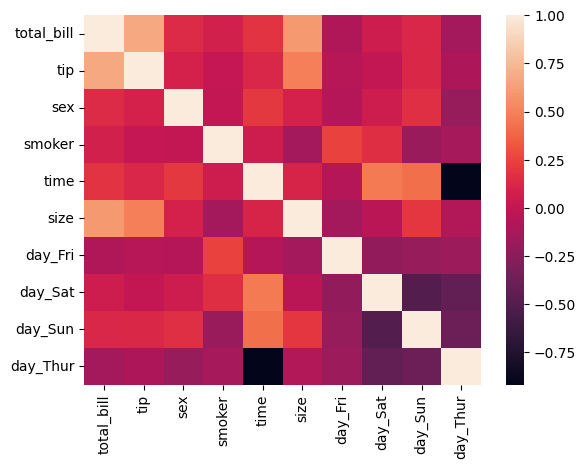

In [46]:
sns.heatmap(df.corr())

In [48]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,0,1,2,0.0,0.0,1.0,0.0
1,10.34,1.66,1,0,1,3,0.0,0.0,1.0,0.0
2,21.01,3.50,1,0,1,3,0.0,0.0,1.0,0.0
3,23.68,3.31,1,0,1,2,0.0,0.0,1.0,0.0
4,24.59,3.61,0,0,1,4,0.0,0.0,1.0,0.0


In [49]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'time', 'size', 'day_Fri',
       'day_Sat', 'day_Sun', 'day_Thur'],
      dtype='object')

In [50]:
X = df.drop(columns=['time'])
Y = df.drop(columns=['total_bill','tip','sex','smoker','size','size', 'day_Fri','day_Sat', 'day_Sun', 'day_Thur'])
print(X)
print('--------------')
print(Y)

     total_bill   tip  sex  smoker  size  day_Fri  day_Sat  day_Sun  day_Thur
0         16.99  1.01    0       0     2      0.0      0.0      1.0       0.0
1         10.34  1.66    1       0     3      0.0      0.0      1.0       0.0
2         21.01  3.50    1       0     3      0.0      0.0      1.0       0.0
3         23.68  3.31    1       0     2      0.0      0.0      1.0       0.0
4         24.59  3.61    0       0     4      0.0      0.0      1.0       0.0
..          ...   ...  ...     ...   ...      ...      ...      ...       ...
239       29.03  5.92    1       0     3      0.0      1.0      0.0       0.0
240       27.18  2.00    0       1     2      0.0      1.0      0.0       0.0
241       22.67  2.00    1       1     2      0.0      1.0      0.0       0.0
242       17.82  1.75    1       0     2      0.0      1.0      0.0       0.0
243       18.78  3.00    0       0     2      0.0      0.0      0.0       1.0

[244 rows x 9 columns]
--------------
     time
0       1
1    

In [51]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
classifier = GaussianNB()
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(x_test)
score = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(score)
print(report)
print(cm)

0.9591836734693877
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.94      0.97        34

    accuracy                           0.96        49
   macro avg       0.94      0.97      0.95        49
weighted avg       0.96      0.96      0.96        49

[[15  0]
 [ 2 32]]


e:\jai\Python Workspace\Krish Naik Udemy\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
